# I- 94 Traffic Dataset

In [4]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
# reading the csv file
df = pd.read_csv(r'C:\Users\ABDULLAH\Desktop\traffic_data.csv')
df.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


The datset has 48204 rows and 9 columns with no column having null values.

(array([8089., 5102., 2839., 4753., 4770., 4342., 7888., 5636., 3857.,
         928.]),
 array([   0.,  728., 1456., 2184., 2912., 3640., 4368., 5096., 5824.,
        6552., 7280.]),
 <BarContainer object of 10 artists>)

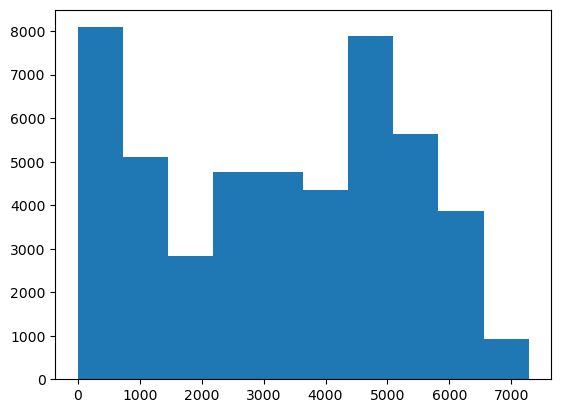

In [7]:
%matplotlib inline
plt.hist(df['traffic_volume'])

In [24]:
print(df['date_time'].min(), '\n', df['date_time'].max())

2012-10-02 09:00:00 
 2018-09-30 23:00:00


The date is in the yyyy-mm-dd 24:00 format. We have data from October,2, 2012 to September 30, 2018

In [25]:
df['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

We see a variation in traffic volume. About 25 % of times, there were 1193 or less cars. Since the date is in 24 hours format, we need to distinguish the data between daytime and nighttime.

## Traffic Volume: Day vs Night

Dividing the datset in two parts.
 - Daytime hours = 8:00 - 20:00 (12 hours)
 - Nighttime hours = 20:00 - 08:00 (12 hours)

In [35]:
# the date_time is stored as an object type. Will convert it into datetime object
df['date_time'] =  pd.to_datetime(df['date_time'])

In [57]:
day = df[(df['date_time'].dt.hour >= 8) & (df['date_time'].dt.hour < 20)]
day.shape

(23759, 9)

In [59]:
night = df[(df['date_time'].dt.hour >= 20) | (df['date_time'].dt.hour < 8)]
night.shape

(24445, 9)

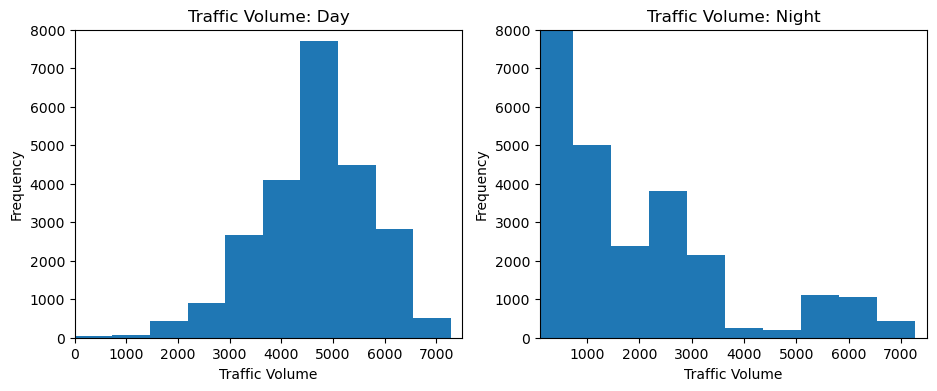

In [72]:
plt.figure(figsize=(11,4))

plt.subplot(1, 2, 1)
plt.hist(day['traffic_volume'])
plt.xlim(0, 7500)
plt.ylim(0, 8000)
plt.title('Traffic Volume: Day')
plt.ylabel('Frequency')
plt.xlabel('Traffic Volume')

plt.subplot(1, 2, 2)
plt.hist(night['traffic_volume'])
plt.xlim(100, 7500)
plt.ylim(0, 8000)
plt.title('Traffic Volume: Night')
plt.ylabel('Frequency')
plt.xlabel('Traffic Volume')

plt.show()

In [73]:
day['traffic_volume'].describe()

count    23759.00000
mean      4641.33924
std       1068.65102
min          0.00000
25%       4049.00000
50%       4708.00000
75%       5337.00000
max       7280.00000
Name: traffic_volume, dtype: float64

In [74]:
night['traffic_volume'].describe()

count    24445.000000
mean      1917.067089
std       1736.799020
min          0.000000
25%        532.000000
50%       1242.000000
75%       2772.000000
max       7260.000000
Name: traffic_volume, dtype: float64

The traffic at night is generally low.
Since we want to find indicators of heavy traffic, we will consider day time data only

## Time Indicators

One of the possible indicators of heavy traffic is time. We will break time into
 - month
 - day

In [101]:
# adding a column for year
day['year'] = day['date_time'].dt.year

C:\Users\ABDULLAH\AppData\Local\Temp\ipykernel_15008\2619835699.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  day['year'] = day['date_time'].dt.year


C:\Users\ABDULLAH\AppData\Local\Temp\ipykernel_15008\1749039250.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  day['month'] = day['date_time'].dt.month


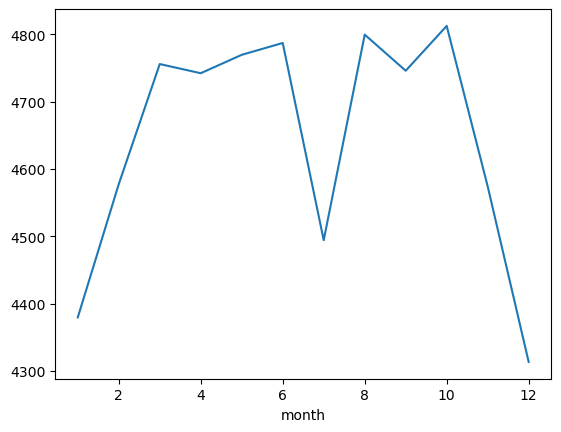

In [102]:
day['month'] = day['date_time'].dt.month
by_month = day.groupby('month').mean()
by_month['traffic_volume'].plot.line()
plt.show()

Cold months have less traffic. In summer, we have heavy traffic with an eception of July.

In [103]:
day.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,year,month
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545,2012,10
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516,2012,10
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767,2012,10
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026,2012,10
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918,2012,10


In [104]:
july_only = day[day['month'] == 7]
july_only.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,year,month
7351,None,291.59,0.0,0.0,1,Clear,sky is clear,2013-07-01 08:00:00,5742,2013,7
7352,None,294.15,0.0,0.0,1,Clear,sky is clear,2013-07-01 09:00:00,4764,2013,7
7353,None,295.60,0.0,0.0,1,Clear,sky is clear,2013-07-01 10:00:00,4669,2013,7
7354,None,297.15,0.0,0.0,1,Clear,sky is clear,2013-07-01 11:00:00,4863,2013,7
7355,None,298.15,0.0,0.0,1,Clear,sky is clear,2013-07-01 12:00:00,5184,2013,7


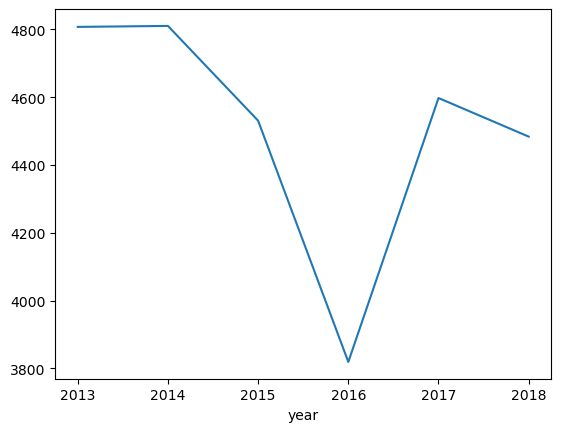

In [105]:
july_only.groupby('year').mean()['traffic_volume'].plot.line()
plt.show()

Traffic in July is generally high. It was low because of road construction during that time period.

In [106]:
day.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,year,month
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545,2012,10
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516,2012,10
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767,2012,10
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026,2012,10
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918,2012,10


## Time Indicators - Narrowing our focus

In [107]:
day['day_of_week'] = day['date_time'].dt.dayofweek

C:\Users\ABDULLAH\AppData\Local\Temp\ipykernel_15008\4072864716.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  day['day_of_week'] = day['date_time'].dt.dayofweek


<AxesSubplot:xlabel='day_of_week'>

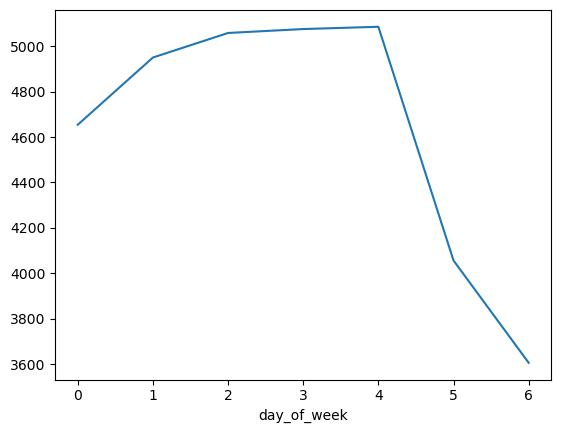

In [109]:
by_day_of_week = day.groupby('day_of_week')
by_day_of_week['traffic_volume'].mean().plot.line()

With 0 representing Monday, we see heavy traffic from Monday through Friday. On Sunday, there is minimum traffic.

Dividing the week days between working days and weekends, as traffic_values on weekends will decrease the average weekly traffic.

In [114]:
day['hour'] = day['date_time'].dt.hour

C:\Users\ABDULLAH\AppData\Local\Temp\ipykernel_15008\2371251799.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  day['hour'] = day['date_time'].dt.hour


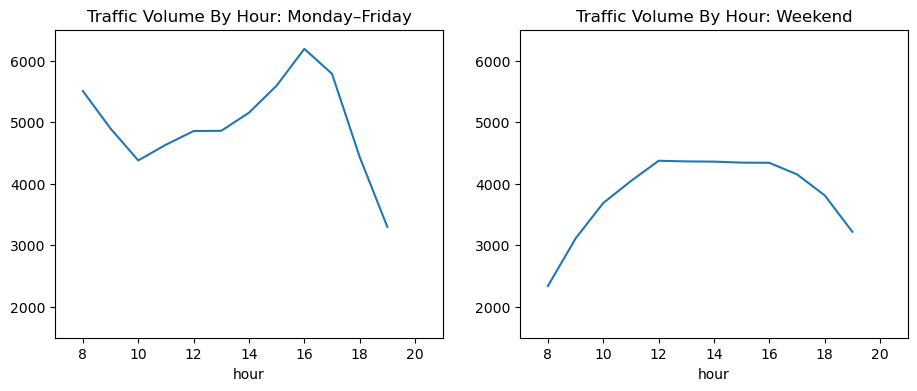

In [122]:
bussiness_days = day[day['day_of_week'] <= 4] # 4 == Friday
weekend = day[day['day_of_week'] >= 5] # 5 == Saturday
by_hour_business = bussiness_days.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()


plt.figure(figsize=(11,4))

plt.subplot(1, 2, 1)
by_hour_business['traffic_volume'].plot.line()
plt.xlim(7,21)
plt.ylim(1500,6500)
plt.title('Traffic Volume By Hour: Monday–Friday')

plt.subplot(1, 2, 2)
by_hour_weekend['traffic_volume'].plot.line()
plt.xlim(7,21)
plt.ylim(1500,6500)
plt.title('Traffic Volume By Hour: Weekend')

plt.show()

At each hour of the day, the traffic volume is generally higher during business days compared to the weekends. At 8:00 in the morning and 16:00 in the evening, volume is high as people commute to and from office.

We can summarize as:
- Traffic volume is high in summers
- On business days
- At hours 8:00 and 16:00

## Weather Indicators

The relevant columns are temp, rain_1h, snow_1h, clouds_all, weather_main, weather_description. Finding correlation with traffic_volume.

In [128]:
day.corr()['traffic_volume']

temp              0.133283
rain_1h           0.005001
snow_1h           0.005186
clouds_all       -0.037828
traffic_volume    1.000000
year             -0.006632
month            -0.012350
day_of_week      -0.324395
hour              0.004045
Name: traffic_volume, dtype: float64

Only the column temp has the strongest correlation, which irself is very weak though. (0.13)

(230.0, 330.0)

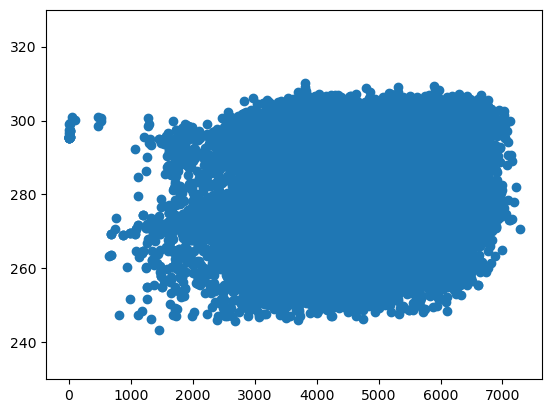

In [131]:
plt.scatter(x='traffic_volume', y='temp', data= day)
plt.ylim(230,330)

Temperature is not a good indicator of traffic.

The other two categoricla columns are weather_main and weather_description. We're going to calculate the average traffic volume associated with each unique value in these two columns.

In [134]:
day['weather_main'].unique()

array(['Clouds', 'Clear', 'Rain', 'Drizzle', 'Mist', 'Haze', 'Fog',
       'Thunderstorm', 'Snow', 'Smoke', 'Squall'], dtype=object)

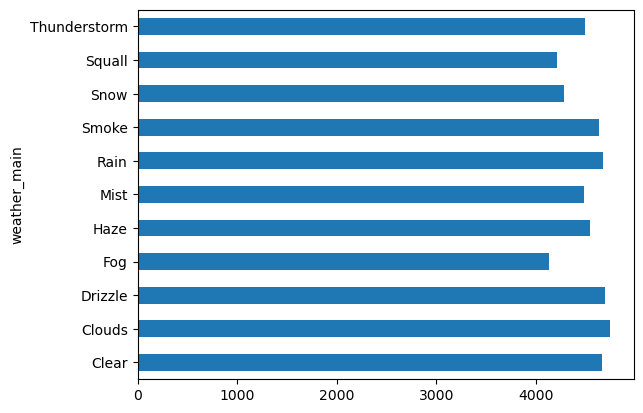

In [142]:
by_weather_main = day.groupby('weather_main').mean()
by_weather_main['traffic_volume'].plot.barh()
plt.show()

There is not much difference on the traffic volume, between different weather types. Lets consider weather descriptions

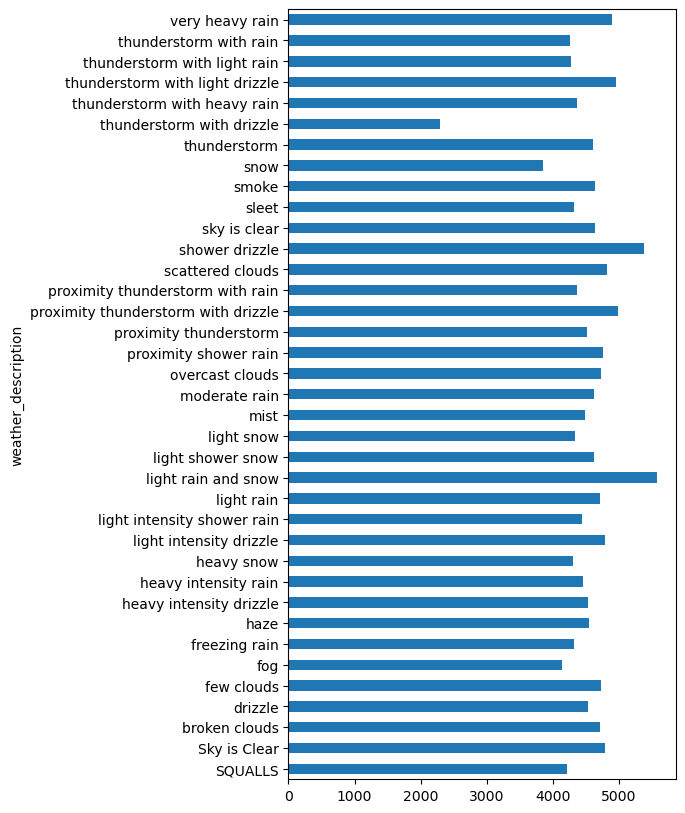

In [147]:
by_weather_desc = day.groupby('weather_description').mean()
by_weather_desc['traffic_volume'].plot.barh(figsize = (5,10))
plt.show()

There are two weather conditions where traffic was above 5,000.
 - Light rain and snow
 - Shower drizzle

### Conclusion

We worked to find a few indicators of heavy traffic on the I-94 Interstate highway. We found two types of indicators:

* Time indicators
 - The traffic is usually heavier during warm months compared to cold months.
 - The traffic is usually heavier on business days compared to the weekends.
 - On business days, the rush hours are around 8 and 16.

* Weather indicators

 - Shower drizzle
 - Light rain and snow